In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA




In [85]:
data_mnist = fetch_openml("mnist_784")
data_mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [86]:
x_mnist = data_mnist.data
y_mnist = data_mnist.target.astype(int)

In [88]:
pca = PCA(n_components=50, random_state=42)
x_pca = pca.fit_transform(x_mnist)

In [89]:
k = 10
k_means = KMeans(n_clusters=k , random_state=45)
y_pred = k_means.fit_predict(x_pca)
pd.unique(y_pred)



array([4, 0, 7, 9, 1, 6, 2, 5, 3, 8])

In [90]:
df_clusters = pd.DataFrame({"True Label": y_mnist, "Cluster": y_pred})
print(df_clusters.groupby("Cluster")["True Label"].value_counts())

Cluster  True Label
0        0             5526
         6               92
         2               74
         5               69
         9               46
                       ... 
9        6              194
         4              180
         9              116
         3               88
         0               31
Name: count, Length: 97, dtype: int64


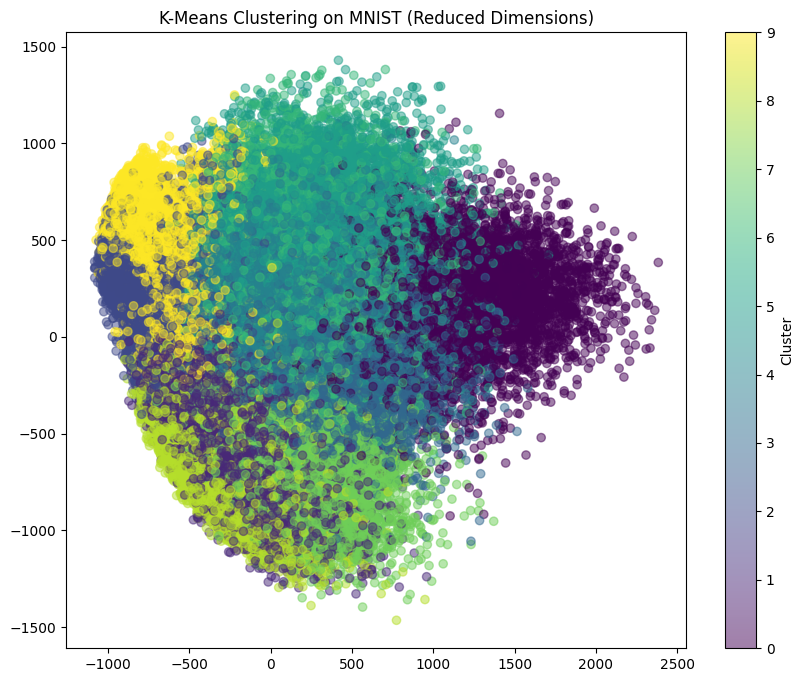

In [91]:
pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_pca)


plt.figure(figsize=(10, 8))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering on MNIST (Reduced Dimensions)")
plt.show()

In [92]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari_score = adjusted_rand_score(y_mnist, y_pred)
print(f"ARI Score: {ari_score:.2f}")

sil_score = silhouette_score(x_pca, y_pred)
print(f"Silhouette Score: {sil_score:.2f}")

ARI Score: 0.41
Silhouette Score: 0.08


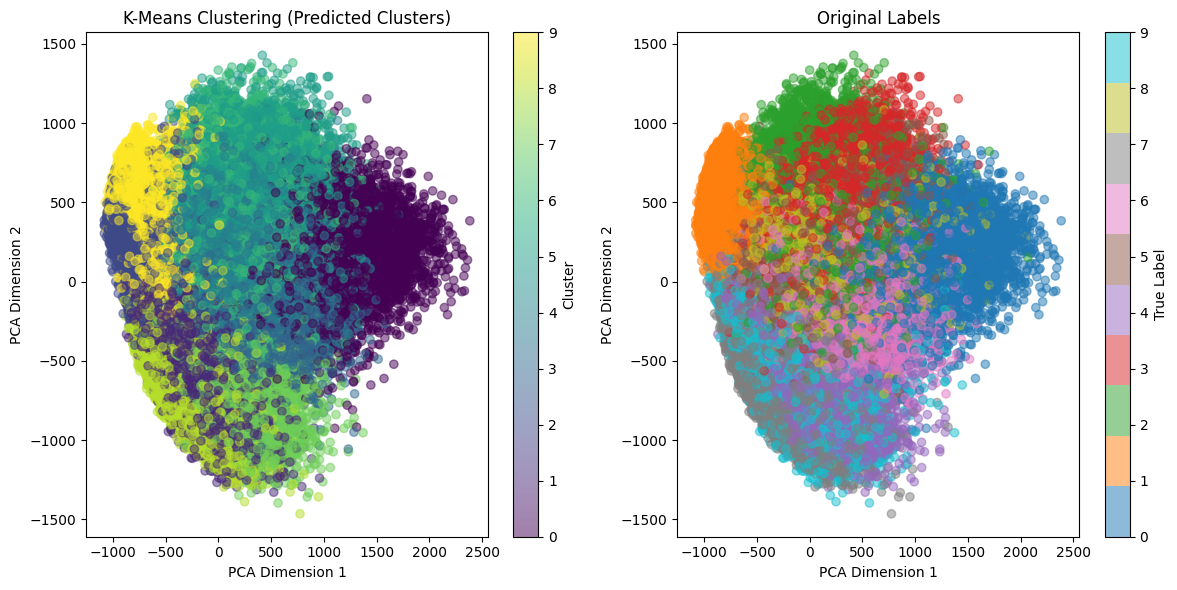

In [93]:
import matplotlib.pyplot as plt

# کاهش داده‌ها به 2 بعد با PCA
pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_pca)

# نمودار خوشه‌بندی بر اساس برچسب‌های پیش‌بینی شده
plt.figure(figsize=(12, 6))

# خوشه‌بندی (Predicted Clusters)
plt.subplot(1, 2, 1)
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering (Predicted Clusters)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# برچسب‌های واقعی (True Labels)
plt.subplot(1, 2, 2)
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_mnist, cmap='tab10', alpha=0.5)
plt.colorbar(label='True Label')
plt.title('Original Labels')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

plt.tight_layout()
plt.show()


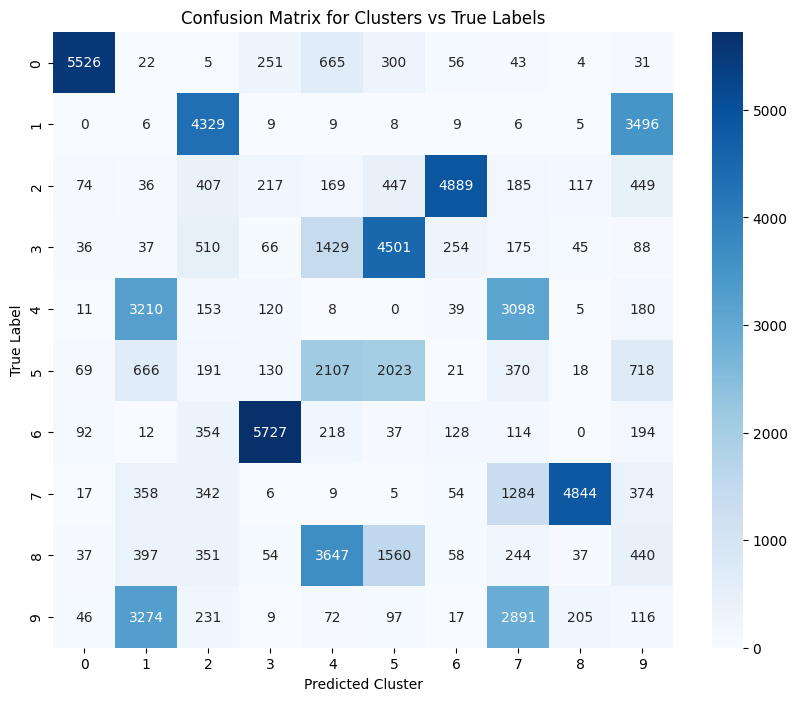

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# ایجاد ماتریس سردرگمی
conf_matrix = confusion_matrix(y_mnist, y_pred)

# رسم نمودار
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Clusters vs True Labels')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()


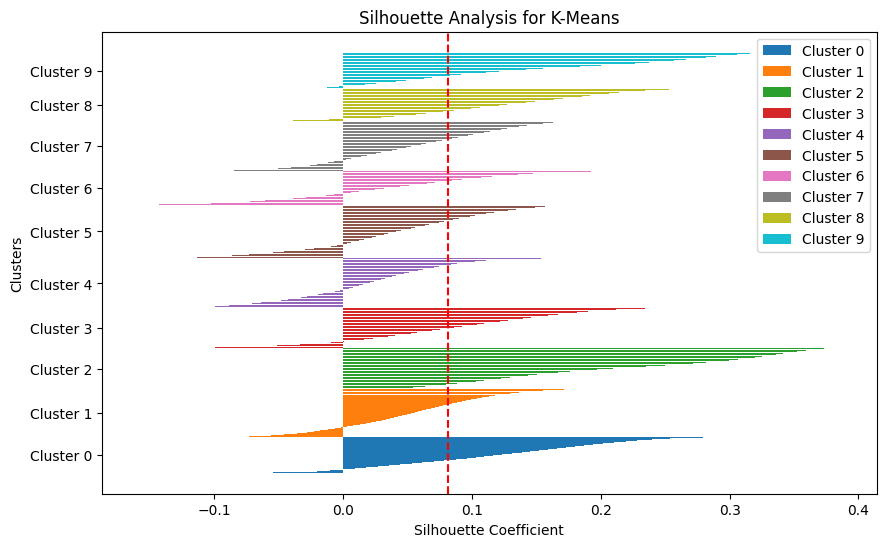

In [95]:
from sklearn.metrics import silhouette_samples
import numpy as np

# محاسبه امتیازات Silhouette
silhouette_vals = silhouette_samples(x_pca, y_pred)

# رسم نمودار
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower = 0
for i in range(k):
    cluster_sil_vals = silhouette_vals[y_pred == i]
    cluster_sil_vals.sort()
    y_upper = y_lower + len(cluster_sil_vals)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', label=f'Cluster {i}')
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cluster {i}' for i in range(k)])
plt.ylabel('Clusters')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Analysis for K-Means')
plt.legend(loc='best')
plt.show()


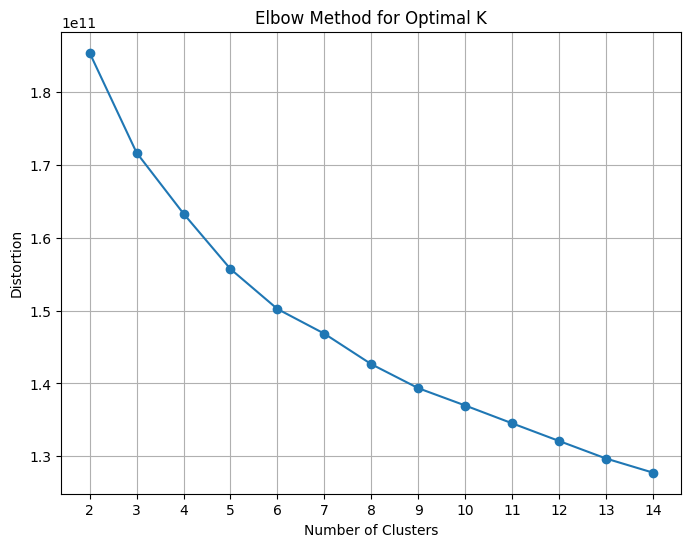

In [96]:
distortions = []
k_range = range(2, 15)

for k in k_range:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(x_pca)
    distortions.append(k_means.inertia_)

# رسم نمودار Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(k_range)
plt.grid()
plt.show()


In [28]:
data = pd.read_csv("donut3.csv")


In [29]:
data

,a0,a1,class
0,-0.263573,0.722940,0
1,-0.248011,0.692245,0
2,-0.266319,0.708402,0
3,-0.264490,0.714163,0
4,-0.248526,0.693369,0
...,...,...,...
994,-0.200445,0.690580,2
995,-0.200285,0.692460,2
996,-0.200160,0.694342,2
997,-0.200071,0.696227,2


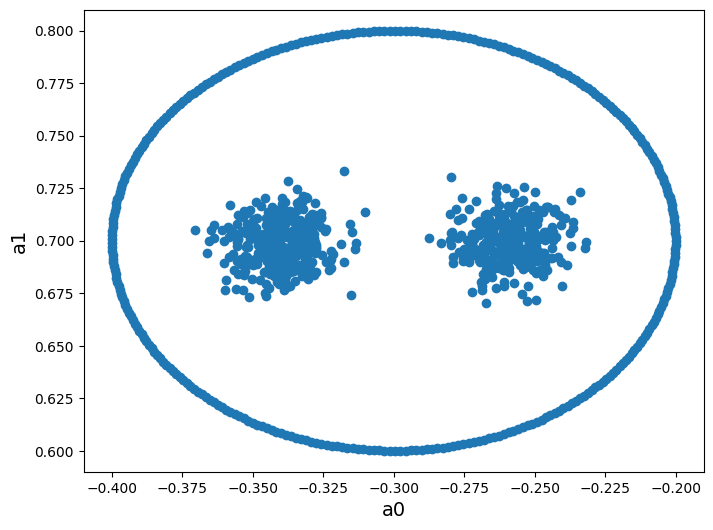

In [52]:
x = data['a0']
y = data['a1']

plt.figure(figsize=(8, 6)) 
plt.scatter(x, y)
plt.xlabel('a0', fontsize=14)
plt.ylabel('a1', fontsize=14)

plt.show()


In [53]:
k = 5
k_means = KMeans(n_clusters=k , random_state=45)
y_pred = k_means.fit_predict(data)



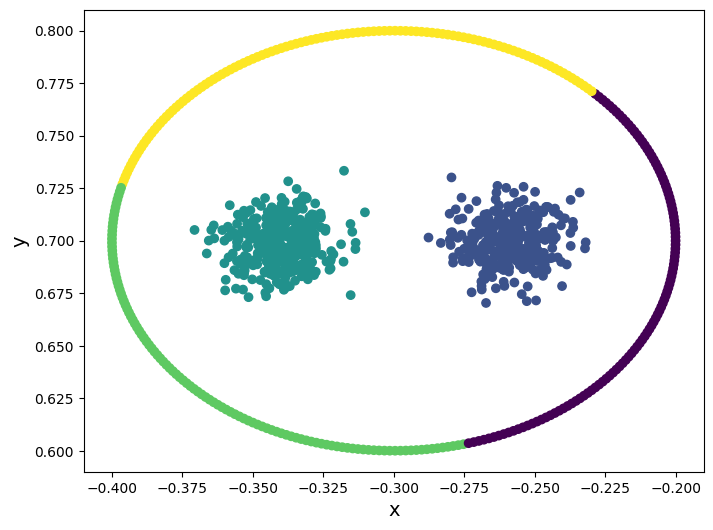

In [57]:
plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, c=y_pred)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

In [ ]:
#BDSCAN

In [60]:
dbscan = DBSCAN(eps=0.05 , min_samples=5)
y_dbscan_pred = dbscan.fit_predict(data)

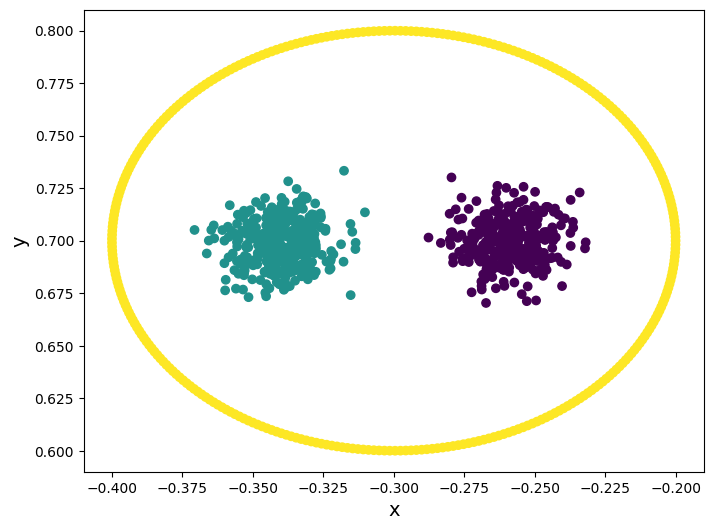

In [ ]:
plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, c=y_dbscan_pred)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()